In [1]:
import ringity as rng
import networkx as nx
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FIBRO_FILE = "connectivity_FLS11_data.xls"

name = "FLS18 TNF"

In [14]:
d = 115   # threshold

fibro_position_df = pd.read_excel(FIBRO_FILE, sheet_name=name)
D_fibro = squareform(pdist(fibro_position_df[['Position X','Position Y','Position Z']])) # distance matrix

G_fibro = nx.from_numpy_array(np.where(D_fibro > d,0,1))    # create (unweighted) network 
G_fibro = G_fibro.subgraph(max(nx.connected_components(G_fibro), key=len)).copy() # get lcc, in case threshold was chosen too low
    
pos = nx.spring_layout(G_fibro)

In [15]:
G_fibro.remove_edges_from(nx.selfloop_edges(G_fibro))


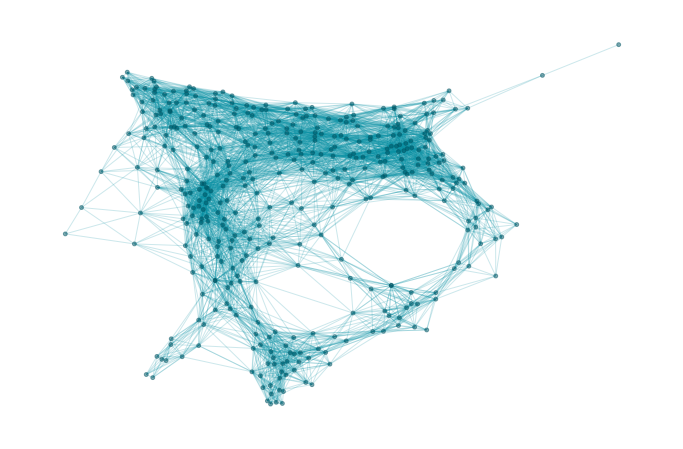

In [16]:
rng.plot_nx(G_fibro, pos=pos, node_alpha=0.5)
plt.savefig('fibro_network.png')

In [6]:
dgm = rng.diagram(G_fibro)

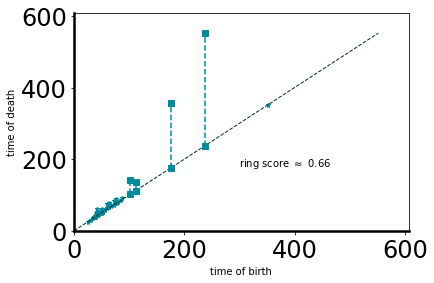

In [7]:
rng.plot_dgm(dgm)
for coordinates in dgm:
    # green line if alive for at least 20
    if coordinates[0]+20 < coordinates[1]:
        plt.plot([coordinates[0],coordinates[0]],[coordinates[0], coordinates[1]], 's--', color=(0/255, 140/255, 160/255))

plt.xlabel('time of birth')
plt.ylabel('time of death')

plt.text(300, 180, r"ring score $\approx$ 0.66")


plt.savefig('fibro_persistence_diagram.png')

In [8]:
dgm.ring_score()

0.6648079056159881